<a href="https://colab.research.google.com/github/Srivathshan-Paramalingam-0505/DMML2022_UNIL_Zoom/blob/main/Codes_Notebooks/different_tokenizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b>Context</b>
To be able to computer text on classifier models, we are going to vectorize it,allowing algorithms to learn from our data and predict a new set of sentences with the best accuracy possible. To maximize our chance, we will tune our models the fittest way.

##<b>Libraries</b>
Below are the libraries we will use for either cleaning or training data, or even displaying different graphical ways to interpret our results.

In [ ]:
#Import packages to create/modify DataFrames
import pandas as pd 

#Import packages to tokenize and clean data
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import spacy
from spacy import displacy
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')

#Import packages to display information on charts, table and other graphical elements
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Import packages to vectorize and train data through models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

#Other imports
import numpy as np
from google.colab import drive
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##<b>Import our data</b>
First, we will download the data we need from our Google Drive Folder

In [ ]:
#Load the dataset using google drive mount (inspired by the challenge notebook)
#Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#let's load the dataset

df = pd.read_csv('drive/MyDrive/Coding_Challenge/training_data.csv')

In [ ]:
df_pred = pd.read_csv('drive/MyDrive/Coding_Challenge/unlabelled_test_data.csv')

* Here is a subset of our training data

In [ ]:
df.head(5)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


* And here is a sample of the data we are aiming to classify

In [ ]:
df_pred.head(5)

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


- Here is the base rate of our DataFrame

In [ ]:
base_rate = (df['difficulty'].value_counts() / len(df)).max()
base_rate

0.169375

>Now, we will set our dependent (y) and independent (X) variables



In [ ]:
#Splitting the data
X = df['sentence']
y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Then we will apply a linear regression as a classifier but first use the vector "tfidf" to make it possible since the model requires numeric values

In [ ]:
#Define a model AND apply vectorizer
LR = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', LR)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='newton-cg',
                                    tol=0.001))])

Here we define a function we will use throughout the whole notebook since it allows to display metrics about our result

In [ ]:
#function to calculate metrics of the models
def models_metrics (true, pred):
  precision = precision_score(true, pred, average='weighted')
  recall = recall_score(true, pred, average='weighted')
  f1 = f1_score(true, pred, average='weighted')
  accuracy = accuracy_score(true,pred)
  conf_mat = confusion_matrix(true, pred)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred,)}")
  print(f"ACCURACY SCORE:\n{accuracy:.4f}")
  print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
  return precision, recall, f1, accuracy

In [ ]:
#predict on test split
y_pred_lr = pipe.predict(X_test)

- The confusion Matrix displays true values (y-axis) compared to predicted values (x-axis)

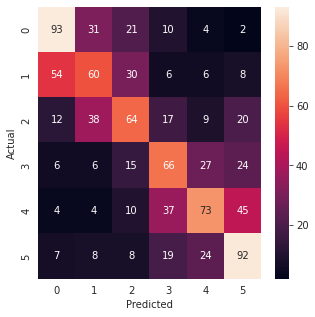

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4656
	Recall: 0.4667
	F1_Score: 0.4640


In [ ]:
#get the metrics
precision_lr, recall_lr, f1_lr, accuracy_lr = models_metrics(y_test,y_pred_lr)

So here we are interested in our accuracy score and as we can see, it is almost predicted with 50% precision

Now, let's try different tokenization method, with different models

In [ ]:
#Import stop_word of french language
french_stopwords = set(stopwords.words('french'))
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]

In [ ]:
#Tokenize, then keep only non stop words
filtre_stopfr(word_tokenize(X.loc[25], language="french") )

["Qu'est-ce",
 'peut',
 'bien',
 'poser',
 'problème',
 'petits',
 'livrets',
 'pourtant',
 'plutôt',
 'attractifs',
 'seuls',
 '23',
 ',',
 '4',
 '%',
 'leurs',
 'détenteurs',
 'arrivent',
 'bout',
 '?']

In [ ]:
#Spacy contains a lot of useful methods to clean data from text
!python -m spacy download fr_core_news_sm
sp = spacy.load('fr_core_news_sm')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 579 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
#Each sentence will be filtered from its space
def spacy_tokenizer(sentence):
  mytokens = sp(sentence)
  mytokens = [ word for word in mytokens if (word.is_space == False)]
  return mytokens

In [ ]:
spacy_tokenizer(X.loc[25])

[Qu',
 est,
 -ce,
 qui,
 peut,
 bien,
 poser,
 problème,
 dans,
 ces,
 petits,
 livrets,
 pourtant,
 plutôt,
 attractifs,
 pour,
 que,
 seuls,
 23,
 ,,
 4,
 %,
 de,
 leurs,
 détenteurs,
 arrivent,
 au,
 bout,
 ?]

<b>As we tried the spacy tokenizer in the first notebook, we wanted to test new ways to filter our sentences</b>

Here we will use the regular expression library

In [ ]:
#With that method, we can remove useless information about difficulty
sp_pattern = re.compile( """[\.\!\"\s\?\-\,\'\%\d\:\;\_]+""", re.M).split
sp_pattern(X.loc[25])

['Qu',
 'est',
 'ce',
 'qui',
 'peut',
 'bien',
 'poser',
 'problème',
 'dans',
 'ces',
 'petits',
 'livrets',
 'pourtant',
 'plutôt',
 'attractifs',
 'pour',
 'que',
 'seuls',
 'de',
 'leurs',
 'détenteurs',
 'arrivent',
 'au',
 'bout',
 '']

In [ ]:
#Here we want to make it so that we never have twice the same word in a sentence
def no_repeat_word (sentence):
  word = sp_pattern(sentence)
  word_list =[]
  for element in word:
    if (element not in word_list):
      word_list.append(element)
  return word_list

In [ ]:
no_repeat_word(X.loc[23])

['Je',
 'ne',
 't',
 'ai',
 'pas',
 'téléphoné',
 'parce',
 'que',
 'j',
 'eu',
 'trop',
 'de',
 'travail',
 '']

- That method didn't work since the model becomes more precise when we have much data

In [ ]:
#That function will remove the digits in our sentence
def without_numbers (data):
  data = re.sub(" \d+", " ", data)
  data = sp_pattern(data)
  return data
without_numbers (X.loc[25])

['Qu',
 'est',
 'ce',
 'qui',
 'peut',
 'bien',
 'poser',
 'problème',
 'dans',
 'ces',
 'petits',
 'livrets',
 'pourtant',
 'plutôt',
 'attractifs',
 'pour',
 'que',
 'seuls',
 'de',
 'leurs',
 'détenteurs',
 'arrivent',
 'au',
 'bout',
 '']

- It will appear that it doesn't improve the models but we rather lose a bit of accuracy

In [ ]:
#Trying to combine our character filter with the stopwords filter
# and it results that it's less effective with stopwords
def clean_data (data): 
  cleaned_data = sp_pattern (data)
  cleaned_data = filtre_stopfr(cleaned_data)
  return cleaned_data

In [ ]:
clean_data(X.loc[25])

['peut',
 'bien',
 'poser',
 'problème',
 'petits',
 'livrets',
 'pourtant',
 'plutôt',
 'attractifs',
 'seuls',
 'leurs',
 'détenteurs',
 'arrivent',
 'bout',
 '']

<b> After testing all the different tokenizations above, we selected the one which were giving the best accuracy :
- sp_pattern : it actually just removes useless characters and thus improve our precision 

###We're going to try this tokenization method with the different models

- <font color = 'red'>Random Forest classifier

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,1))

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer= sp_pattern, ngram_range=(1,1))

In [ ]:
Randfor=RandomForestClassifier(n_estimators=500)

In [ ]:
# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', Randfor)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<built-in method split of re.Pattern object at 0x7fb4ccea21d0>)),
                ('classifier', RandomForestClassifier(n_estimators=500))])

In [ ]:
y_pred_randfor=pipe.predict(X_test)

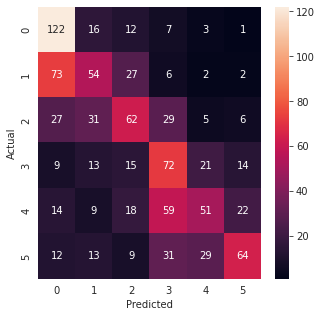

CONFUSION MATRIX:
[[122  16  12   7   3   1]
 [ 73  54  27   6   2   2]
 [ 27  31  62  29   5   6]
 [  9  13  15  72  21  14]
 [ 14   9  18  59  51  22]
 [ 12  13   9  31  29  64]]
ACCURACY SCORE:
0.4427
CLASSIFICATION REPORT:
	Precision: 0.4521
	Recall: 0.4427
	F1_Score: 0.4333


In [ ]:
precision_randfor, recall_randfor, f1_randfor, accuracy_randfor = models_metrics(y_test, y_pred_randfor)

In [ ]:
accuracy_score_randfor = round(accuracy_score (y_test, y_pred_randfor),4)
accuracy_score_randfor

0.4427

- <font color = 'red'>Now with the Logistic Regression

In [ ]:
#Define a model AND apply vectorizer
LR = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
pipe_lr = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LR)])

# Fit model on training set
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<built-in method split of re.Pattern object at 0x7fb4ccea21d0>)),
                ('classifier',
                 LogisticRegression(C=1, max_iter=1000, solver='newton-cg',
                                    tol=0.001))])

In [ ]:
y_pred_lr2=pipe_lr.predict(X_test)

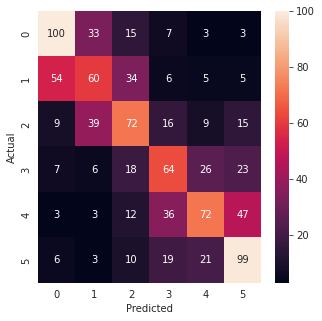

CONFUSION MATRIX:
[[100  33  15   7   3   3]
 [ 54  60  34   6   5   5]
 [  9  39  72  16   9  15]
 [  7   6  18  64  26  23]
 [  3   3  12  36  72  47]
 [  6   3  10  19  21  99]]
ACCURACY SCORE:
0.4865
CLASSIFICATION REPORT:
	Precision: 0.4845
	Recall: 0.4865
	F1_Score: 0.4828


In [ ]:
precision_lr2, recall_lr2, f1_lr2, accuracy_lr2 = models_metrics(y_test,y_pred_lr2)

In [ ]:
accuracy_score_lr = round(accuracy_score (y_test, y_pred_lr),4)

We can see that the Linear Regression works better than the Random Forest classifier

- <font color = 'red'>Now with the SVC classifier

In [ ]:
svc = SVC(gamma="scale", random_state=42,kernel = 'poly', coef0 = 0.5)

In [ ]:
pipe_svc = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', svc)])

# Fit model on training set
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<built-in method split of re.Pattern object at 0x7fb4ccea21d0>)),
                ('classifier', SVC(coef0=0.5, kernel='poly', random_state=42))])

In [ ]:
y_pred_svc=pipe_svc.predict(X_test)

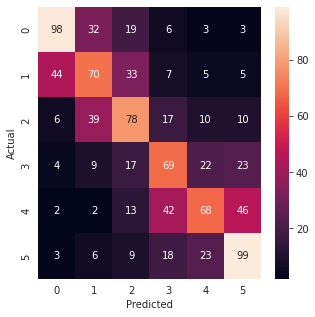

CONFUSION MATRIX:
[[98 32 19  6  3  3]
 [44 70 33  7  5  5]
 [ 6 39 78 17 10 10]
 [ 4  9 17 69 22 23]
 [ 2  2 13 42 68 46]
 [ 3  6  9 18 23 99]]
ACCURACY SCORE:
0.5021
CLASSIFICATION REPORT:
	Precision: 0.5035
	Recall: 0.5021
	F1_Score: 0.5003


In [ ]:
precision_svc, recall_svc, f1_svc, accuracy_svc = models_metrics(y_test,y_pred_svc)

In [ ]:
accuracy_score_svc = round(accuracy_score (y_test, y_pred_svc),4)

###Here is a summary of our different results with most important metrics

In [ ]:
# Creation of a DataFrame showing our different metrics results
metrics = {'Model' : ['Logistic Regression','Random forest','Support vector classification (SVC)'], 
           'Base_rate' : [base_rate, base_rate, base_rate],
           'Accuracy' : [accuracy_lr2, accuracy_randfor, accuracy_svc],
           'Precision' : [precision_lr2, precision_randfor, precision_svc],
           'Recall' : [recall_lr2, recall_randfor, recall_svc],
           'F1 score' : [f1_lr2, f1_randfor, f1_svc]}
df_comparison = pd.DataFrame(data = metrics)
df_comparison

,Model,Base_rate,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.169375,0.486458,0.484539,0.486458,0.482818
1,Random forest,0.169375,0.442708,0.452080,0.442708,0.433297
2,Support vector classification (SVC),0.169375,0.502083,0.503531,0.502083,0.500338


#<font color = 'red'>Code to submit

###That part will be used to upload a CSV file that we will submit on the kaggle competition

In [ ]:
df_pred_submit_svc = df_pred.copy()

In [ ]:
unlabelled_svc=pipe_svc.predict(df_pred_submit_svc['sentence'])
unlabelled_svc

array(['C2', 'B1', 'A1', ..., 'C2', 'C1', 'B1'], dtype=object)

In [ ]:
df_pred_submit_svc['difficulty']=unlabelled_svc #to modify when using another classification model
df_pred_submit_svc =df_pred_submit_svc.drop('sentence',axis=1)

In [ ]:
#for the submission part: 
df_pred_submit_svc.to_csv('teamzoom_submit_svc.csv', encoding ='utf-8-sig',index=False) 
files.download('teamzoom_submit_svc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>